  # PostProcessing
  This notebook is initially designed for PostProcessing ASETS-II numerical and experimental data.
  It can also be used for other configurations's numerical results. But if you want to compare with other experimental data with a different format than ASETS-II. You should find a way to read them to RTD and RTDt in this notebook.

In [1]:
using OscillatingHeatPipe
using Plots
# using Interact

Precompiling OscillatingHeatPipe
  ✓ CodecZlib
  ✓ HTTP
  ✓ WebSockets
  ✓ OscillatingHeatPipe
  4 dependencies successfully precompiled in 20 seconds. 382 already precompiled.


  # Read simulation data

In [2]:
using JLD2

In [3]:
function get_qbplus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbplus = zeros_surface(base_cache)
    return qbplus
end

function get_qbminus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbminus = zeros_surface(base_cache)
    # qbminus .= nrm.u
    return qbminus
end

bcdict = Dict("exterior" => get_qbplus,"interior" => get_qbminus)

Dict{String, Function} with 2 entries:
  "interior" => get_qbminus
  "exterior" => get_qbplus

In [4]:
function heatermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    σ .= phys_params["areaheater_power"] / phys_params["areaheater_area"] / phys_params["flux_correction"] 
end


function condensermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["areaheater_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T) / corr
end

function adiabaticmodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["adiabatic_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T)/ corr
end

adiabaticmodel! (generic function with 1 method)

In [5]:

function ohpmodel!(σ,T,t,fr::LineRegionCache,phys_params)
    σ .= phys_params["ohp_flux"] ./ phys_params["flux_correction"] 
end

ohpmodel! (generic function with 1 method)

In [6]:
x2Dsensors = [0.0,   0.0, 0.0, 0.0, 0.0,-3INCHES+12e-3,-3INCHES+35e-3,-3INCHES+65e-3,3INCHES-65e-3,3INCHES-35e-3,3INCHES-12e-3]
y2Dsensors = [-2e-2, -1e-2, 0.0, 1e-2, 2e-2,0.0,           0.0,            0.0,          0.0,          0.0,          0.0]
plate_sensors = (x2Dsensors,y2Dsensors);

In [6]:
ihot = 3 # hot sensor  for calculating thermal conductance
icold = 11 # cold sensor  for calculating thermal conductance;

11

In [7]:
using Statistics

## get a map of conductance

In [8]:
angle_list = ["00" "30" "60" "90"]
power_list = ["30" "40" "50" "60"]

file_dict = ["zach112"]


1-element Vector{String}:
 "zach112"

In [9]:
# isfile("/Users/yuxuanli/Documents/Hoffman/zach033/numedata/Zach_300s_90D.jld2")

## error bar result

In [52]:
condmap = zeros(length(power_list),length(angle_list))
condavg = zeros(length(power_list),length(angle_list))
condmax = zeros(length(power_list),length(angle_list))
condmin = zeros(length(power_list),length(angle_list))
for ipower in eachindex(power_list)
    for iangle in eachindex(angle_list)

        cond_individual = []
        for ifile in eachindex(file_dict)

        read_path = "/Users/yuxuanli/Documents/Hoffman/"*file_dict[ifile]*"/numedata/H04_C15_D"*angle_list[iangle]*"_P"*power_list[ipower]*".jld2"

        if isfile(read_path)
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            # istart = 200
            # iend = 300
            istart = 50
            iend = 100
            cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            push!(cond_individual,mean(cond[istart:iend]))
        end
        end
        if !isempty(cond_individual)
            println(cond_individual)
            condavg[ipower,iangle] = mean(cond_individual)
            condmax[ipower,iangle] = maximum(cond_individual)
            condmin[ipower,iangle] = minimum(cond_individual)
        end
        
    end  
end

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 234, 90, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 234, 90, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{234, 90, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float6

Any[0.9794277041871903]


┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 232, 86, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 232, 86, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{232, 86, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float6

Any[1.0499131982663439]


┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 234, 90, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 234, 90, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{234, 90, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float6

Any[0.9393887734866007]


┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 232, 86, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 232, 86, Float64, Matrix{Float64}}, ScalarData{426, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{232, 86, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float6

In [53]:
condmax

4×4 Matrix{Float64}:
 0.979428  1.04991  0.939389  1.06184
 0.978805  1.03032  1.15738   1.18029
 0.0       0.0      0.0       0.0
 0.0       0.0      0.0       0.0

In [54]:
condmin

4×4 Matrix{Float64}:
 0.979428  1.04991  0.939389  1.06184
 0.978805  1.03032  1.15738   1.18029
 0.0       0.0      0.0       0.0
 0.0       0.0      0.0       0.0

## one result

In [69]:
angle_list = ["00" "30" "60" "90"]
power_list = ["zach033" "zach034" "zach035" "zach036"]

1×4 Matrix{String}:
 "zach033"  "zach034"  "zach035"  "zach036"

In [12]:
condmap = zeros(length(power_list),length(angle_list))
condavg = zeros(length(power_list),length(angle_list))
condmax = zeros(length(power_list),length(angle_list))
condmin = zeros(length(power_list),length(angle_list))
for ipower in eachindex(power_list)
    for iangle in eachindex(angle_list)

        cond_individual = []
        for ifile in eachindex(file_dict)

        read_path = "/Users/yuxuanli/Documents/Hoffman/"*file_dict[ifile]*"/numedata/H02_C15_D"*angle_list[iangle]*"_P"*power_list[ipower]*".jld2"

        if isfile(read_path)
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            istart = 200
            iend = 300
            cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            push!(cond_individual,mean(cond[istart:iend]))
        end
        end
        if !isempty(cond_individual)
            println(cond_individual)
            condavg[ipower,iangle] = mean(cond_individual)
            condmax[ipower,iangle] = maximum(cond_individual)
            condmin[ipower,iangle] = minimum(cond_individual)
        end
        
    end  
end

In [55]:
x = 30:10:60
y = 0:30:90

0:30:90

In [10]:
condmap

LoadError: UndefVarError: `condmap` not defined

In [11]:
condmap_ref=[2.907 3.411 3.807 4.005;
-1.0 3.259 3.760 3.935;
-1.0 2.953 3.609 3.843;
-1.0 -1.0 3.349 3.647]

4×4 Matrix{Float64}:
  2.907   3.411  3.807  4.005
 -1.0     3.259  3.76   3.935
 -1.0     2.953  3.609  3.843
 -1.0    -1.0    3.349  3.647

In [7]:
read_path="/Users/yuxuanli/Documents/Hoffman/zach036/numedata/Zach_300s_00D.jld2"
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            # istart = 200
            # iend = 300
            # cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            # condmap[ipower,iangle] = (mean(cond[istart:iend]))
# plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

80.0

In [75]:
power

80.0

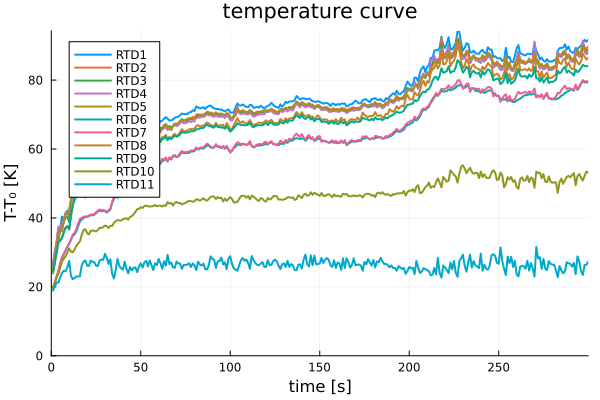

In [76]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult)
# plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

In [88]:
condmap

4×4 Matrix{Float64}:
 1.93584   3.04799  3.777    3.86686
 0.643571  3.07157  3.57918  3.34188
 0.0       2.55403  3.3136   3.36528
 1.35883   1.8491   3.16718  3.3511

In [108]:
# scatter(y,condmap[1,:],label="numerical 50W (5mins)",ylim=(0,4.2))
# scatter!(y,condmap_ref[1,:],label="exp 50W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

In [109]:
# scatter(y,condmap[2,:],label="numerical 60W",ylim=(0,4))
# scatter!(y,condmap_ref[2,:],label="exp 60W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

In [110]:
# scatter(y,condmap[3,:],label="numerical 70W",ylim=(0,4))
# scatter!(y,condmap_ref[3,:],label="exp 70W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

In [111]:
# scatter(y,condmap[4,:],label="numerical 80W",ylim=(0,4))
# scatter!(y,condmap_ref[4,:],label="exp 80W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

In [112]:
# scatter(x,condmap[:,4],label="numerical vertical OHP",ylim=(0,4.2))
# scatter!(x,condmap_ref[:,4],label="exp vertical OHP",xlabel="power [W]",ylabel="thermal conductance [W/K]")

In [113]:
# scatter(x,condmap[:,3],label="numerical 60 degree OHP",ylim=(0,4.2))
# scatter!(x,condmap_ref[:,3],label="exp 60 degree OHP",xlabel="power [W]",ylabel="thermal conductance")

# new results with error bar

In [58]:
condavg

4×4 Matrix{Float64}:
 0.979428  1.04991  0.939389  1.06184
 0.978805  1.03032  1.15738   1.18029
 0.0       0.0      0.0       0.0
 0.0       0.0      0.0       0.0

In [66]:
condmap_ref = [0.973 1.140 1.319 1.317;
    0.943 1.107 1.136 1.154;
    -10 1.170 -10 -10;
    -10 -10 -10 -10
]

4×4 Matrix{Float64}:
   0.973    1.14     1.319    1.317
   0.943    1.107    1.136    1.154
 -10.0      1.17   -10.0    -10.0
 -10.0    -10.0    -10.0    -10.0

In [67]:
condmap_ref

4×4 Matrix{Float64}:
   0.973    1.14     1.319    1.317
   0.943    1.107    1.136    1.154
 -10.0      1.17   -10.0    -10.0
 -10.0    -10.0    -10.0    -10.0

In [72]:
y = [0,30,60,90]

4-element Vector{Int64}:
  0
 30
 60
 90

In [76]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

scatter(y,condavg[1,:],label="numerical 30W (5mins)",yerror=(cond_err_min[1,:],cond_err_max[1,:]),ylim=(0.0,4.2),markershape=:square)
scatter!(y,condmap_ref[1,:],label="exp 30W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

savefig("H04 30W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H04 30W avg.pdf"

In [78]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

scatter(y,condavg[2,:],label="numerical 50W (5mins)",yerror=(cond_err_min[1,:],cond_err_max[1,:]),ylim=(0.0,4.2),markershape=:square)
scatter!(y,condmap_ref[2,:],label="exp 50W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

savefig("H04 40W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H04 40W avg.pdf"

In [30]:
Tref = 291.2# reference temperature (try higher!)
fluid_type = "Butane"
p_fluid = SaturationFluidProperty(fluid_type,Tref) # This function relies on CoolProp.jl package

Saturation properties for Butane at constant temperature 291.2 [K]


In [31]:
p_fluid.P

194889.50294099632

In [32]:
p_fluid.hₗᵥ

368421.01987770374

In [48]:
Tref = 291.3# reference temperature (try higher!)
fluid_type = "Butane"
p_fluid = SaturationFluidProperty(fluid_type,Tref) # This function relies on CoolProp.jl package

Saturation properties for Butane at constant temperature 291.3 [K]


In [49]:
p_fluid.P

195528.87847266952

In [50]:
p_fluid.hₗᵥ

368323.0785432628

In [51]:
p_fluid.ρₗ

580.696548524746

In [36]:
Tref = 291.2# reference temperature (try higher!)
fluid_type = "IsoButane"
p_fluid = SaturationFluidProperty(fluid_type,Tref) # This function relies on CoolProp.jl package

Saturation properties for IsoButane at constant temperature 291.2 [K]


In [37]:
p_fluid.P

284761.3541259627

In [38]:
p_fluid.hₗᵥ

336386.1999960291

In [44]:
Tref = 291.3# reference temperature (try higher!)
fluid_type = "IsoButane"
p_fluid = SaturationFluidProperty(fluid_type,Tref) # This function relies on CoolProp.jl package

Saturation properties for IsoButane at constant temperature 291.3 [K]


In [45]:
p_fluid.P

285637.7241979761

In [46]:
p_fluid.hₗᵥ

336281.1754843815

In [47]:
p_fluid.ρₗ

559.1250596665732

In [44]:
randomXp(SimuResult.integrator_tube.p.tube,numofslugs=30,chargeratio=0.85,σ_charge=0.01)

([(2.608905515325477, 2.7504335232796033), (2.7794467787869332, 2.925182942840403), (2.9499880422483895, 3.0961502465379347), (3.1205293057098458, 3.2643113162849624), (3.291070569171302, 3.435588716208273), (3.4616118326327583, 3.60926878575847), (3.6321530960942146, 3.7729792502261934), (3.802694359555671, 3.950319187280318), (3.973235623017127, 4.116847245028061), (4.143776886478584, 4.289283614111989)  …  (0.9034928807109139, 1.051773573558009), (1.074034144172371, 1.2180252852558482), (1.2445754076338265, 1.3875637882193415), (1.4151166710952836, 1.5574875931090872), (1.585657934556739, 1.7314214416490952), (1.7561991980181961, 1.9040176595103944), (1.9267404614796515, 2.0672643764105363), (2.0972817249411086, 2.246055254138602), (2.267822988402564, 2.4125418034716226), (2.438364251864021, 2.580923066800718)], [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)  …  (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*

In [45]:
] status

Project OscillatingHeatPipe v0.1.0
Status `~/Documents/GitHub/OscillatingHeatPipe/Project.toml`
  [3e975e5d] CartesianGrids v0.1.30
  [5fc296c8] ComputationalHeatTransfer v0.1.0 `https://github.com/JuliaIBPM/ComputationalHeatTransfer.jl.git#main`
  [c257ce95] ConstrainedSystems v0.3.6
  [e084ae63] CoolProp v0.2.0
  [ffbed154] DocStringExtensions v0.9.3
  [fde71243] EasyFit v0.6.6
  [5c019650] GridUtilities v0.1.4
  [cdc13194] ImmersedLayers v0.5.0
  [c601a237] Interact v0.10.5
⌅ [a98d9a8b] Interpolations v0.13.6
⌃ [033835bb] JLD2 v0.4.46
⌃ [1dea7af3] OrdinaryDiffEq v6.66.0
  [d96e819e] Parameters v0.12.3
  [91a5bcdd] Plots v1.40.4
  [92933f4c] ProgressMeter v1.10.0
  [3cdcf5f2] RecipesBase v1.3.4
  [189a3867] Reexport v1.2.2
  [295af30f] Revise v3.5.14
⌃ [befc5f09] RigidBodyTools v0.5.7
  [3a884ed6] UnPack v1.0.2
  [fdbf4ff8] XLSX v0.10.1
  [37e2e46d] LinearAlgebra
  [2f01184e] SparseArrays v1.10.0
  [10745b16] Statistics v1.10.0
Info Packages marked with ⌃ and ⌅ have new versions avai